In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testtc/test.csv
/kaggle/input/traintc/train.csv


In [2]:
df=pd.read_csv('/kaggle/input/traintc/train.csv')
test_data = pd.read_csv('/kaggle/input/testtc/test.csv')


In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)


In [5]:
cabin_by_class = df.groupby('Pclass')['HasCabin'].mean()
print(cabin_by_class)


Pclass
1    0.814815
2    0.086957
3    0.024440
Name: HasCabin, dtype: float64


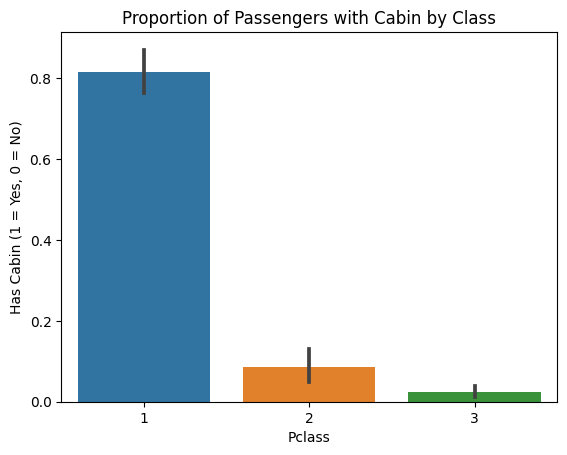

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Pclass', y='HasCabin', data=df)
plt.title("Proportion of Passengers with Cabin by Class")
plt.ylabel("Has Cabin (1 = Yes, 0 = No)")
plt.show()


In [7]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)
df['CabinClass'] = df['Pclass'] * df['HasCabin']


In [8]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 includes the passenger themself


In [9]:
survival_by_family = df.groupby('FamilySize')['Survived'].mean()
print(survival_by_family)


FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


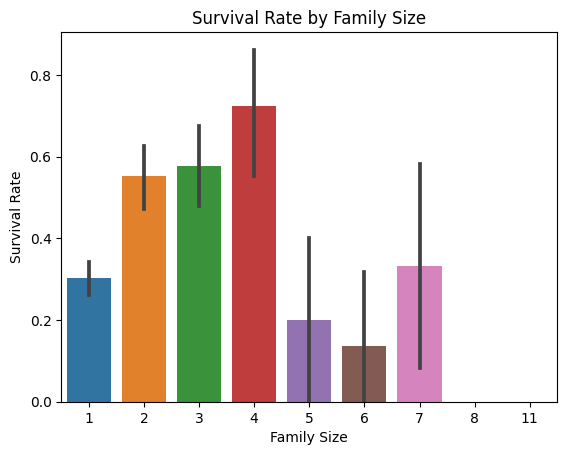

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.ylabel("Survival Rate")
plt.xlabel("Family Size")
plt.show()


In [11]:
def family_group(size):
    if size == 1:
        return 'Solo'
    elif size <= 4:
        return 'Small'
    elif size <= 6:
        return 'Medium'
    else:
        return 'Large'

df['FamilyGroup'] = df['FamilySize'].apply(family_group)


In [12]:
df.groupby('Pclass')['Fare'].mean()


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Fare Distribution by Passenger Class')

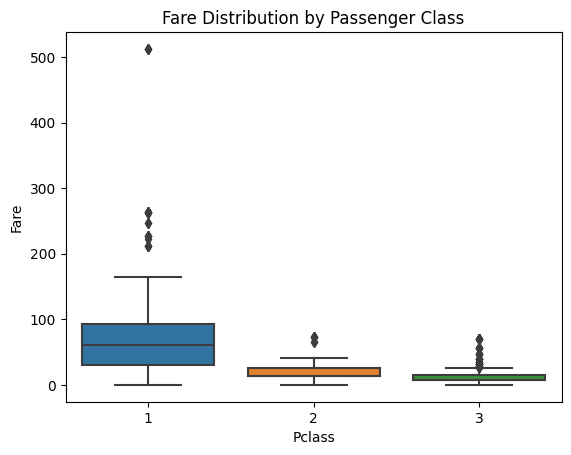

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Passenger Class")


In [14]:
df['Fare_log'] = df['Fare'].apply(lambda x: np.log1p(x))  # log1p handles 0 safely

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


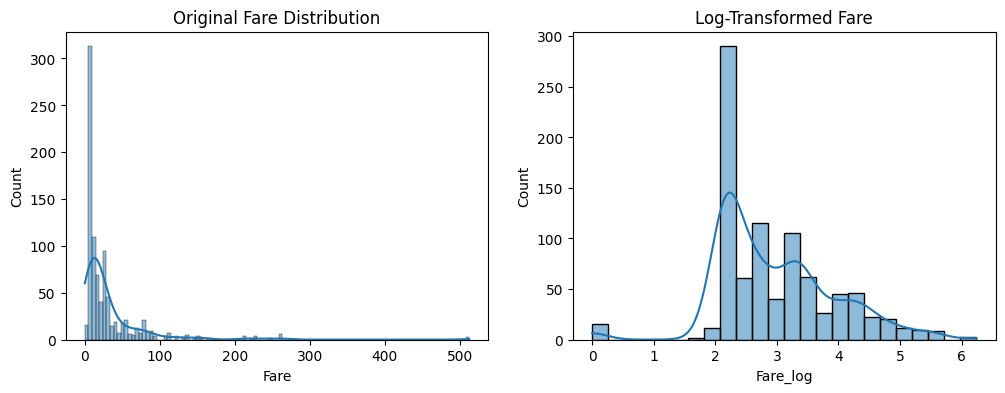

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Fare'], kde=True, ax=ax[0])
ax[0].set_title("Original Fare Distribution")

sns.histplot(df['Fare_log'], kde=True, ax=ax[1])
ax[1].set_title("Log-Transformed Fare")
plt.show()


In [16]:
# 1. Impute missing Age using median by Sex and Pclass
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# 2. Impute missing Embarked values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 3. Extract Deck from Cabin and impute 'U' (Unknown) for missing cabins
df['Deck'] = df['Cabin'].str[0]
df['Deck'].fillna('U', inplace=True)

/tmp/ipykernel_13/1198387443.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
/tmp/ipykernel_13/1198387443.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [17]:
zero_var_cols = df.columns[df.nunique() <= 1]
print("Dropping:", list(zero_var_cols))
df.drop(columns=zero_var_cols, inplace=True)


Dropping: []


In [18]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'HasCabin',
       'CabinClass', 'FamilySize', 'FamilyGroup', 'Fare_log', 'Deck'],
      dtype='object')


In [19]:
df.drop(columns=['Cabin'], inplace=True)


In [20]:
df.isnull().sum().sort_values(ascending=False).head(15)

PassengerId    0
Fare           0
Fare_log       0
FamilyGroup    0
FamilySize     0
CabinClass     0
HasCabin       0
Embarked       0
Ticket         0
Survived       0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
dtype: int64

In [21]:
# Fill missing Fare based on median Fare within each Pclass
df['Fare'] = df.groupby('Pclass')['Fare'].transform(
    lambda x: x.fillna(x.median())
)
df['Fare_log'] = df['Fare'].apply(lambda x: np.log(x + 1))


In [22]:
print(df.select_dtypes(include='object').columns)  # Should be empty
print(df.isnull().sum().sum()) 

Index(['Name', 'Sex', 'Ticket', 'Embarked', 'FamilyGroup', 'Deck'], dtype='object')
0


In [23]:
df.groupby('Embarked')['Survived'].mean()


Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [24]:
df.groupby('Sex')['Survived'].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [25]:
# Group by Sex, Age (you might want to bin age first), and Survived
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

grouped = df.groupby(['Sex', 'AgeBin', 'Survived'])['PassengerId'].count().reset_index()
grouped.rename(columns={'PassengerId': 'Count'}, inplace=True)
print(grouped)


       Sex      AgeBin  Survived  Count
0   female       Child         0     13
1   female       Child         1     19
2   female        Teen         0      9
3   female        Teen         1     27
4   female  YoungAdult         0     43
5   female  YoungAdult         1    130
6   female       Adult         0     16
7   female       Adult         1     54
8   female      Senior         0      0
9   female      Senior         1      3
10    male       Child         0     16
11    male       Child         1     21
12    male        Teen         0     31
13    male        Teen         1      3
14    male  YoungAdult         0    287
15    male  YoungAdult         1     54
16    male       Adult         0    117
17    male       Adult         1     29
18    male      Senior         0     17
19    male      Senior         1      2


/tmp/ipykernel_13/415350966.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Sex', 'AgeBin', 'Survived'])['PassengerId'].count().reset_index()


In [26]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace({
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Lady': 'Rare', 'Countess': 'Rare', 'Capt': 'Rare',
    'Col': 'Rare', 'Don': 'Rare', 'Dr': 'Rare', 'Major': 'Rare',
    'Rev': 'Rare', 'Sir': 'Rare', 'Jonkheer': 'Rare', 'Dona': 'Rare'
})


In [27]:
df['Sex*Pclass'] = df['Sex'].map({'male': 0, 'female': 1}) * df['Pclass']


In [28]:
df['Fare_Per_Person'] = df['Fare'] / df['FamilySize']
df['Fare_Per_Person'].fillna(df['Fare_Per_Person'].median(), inplace=True)


/tmp/ipykernel_13/370820992.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare_Per_Person'].fillna(df['Fare_Per_Person'].median(), inplace=True)


In [29]:
survival_rate = df.groupby(['Sex', 'AgeBin'])['Survived'].mean().reset_index()
print(survival_rate)


      Sex      AgeBin  Survived
0  female       Child  0.593750
1  female        Teen  0.750000
2  female  YoungAdult  0.751445
3  female       Adult  0.771429
4  female      Senior  1.000000
5    male       Child  0.567568
6    male        Teen  0.088235
7    male  YoungAdult  0.158358
8    male       Adult  0.198630
9    male      Senior  0.105263


/tmp/ipykernel_13/2632816335.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df.groupby(['Sex', 'AgeBin'])['Survived'].mean().reset_index()


In [30]:
df.isnull().sum().sort_values(ascending=False).head(15)

PassengerId    0
HasCabin       0
Sex*Pclass     0
Title          0
AgeBin         0
Deck           0
Fare_log       0
FamilyGroup    0
FamilySize     0
CabinClass     0
Embarked       0
Survived       0
Fare           0
Ticket         0
Parch          0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


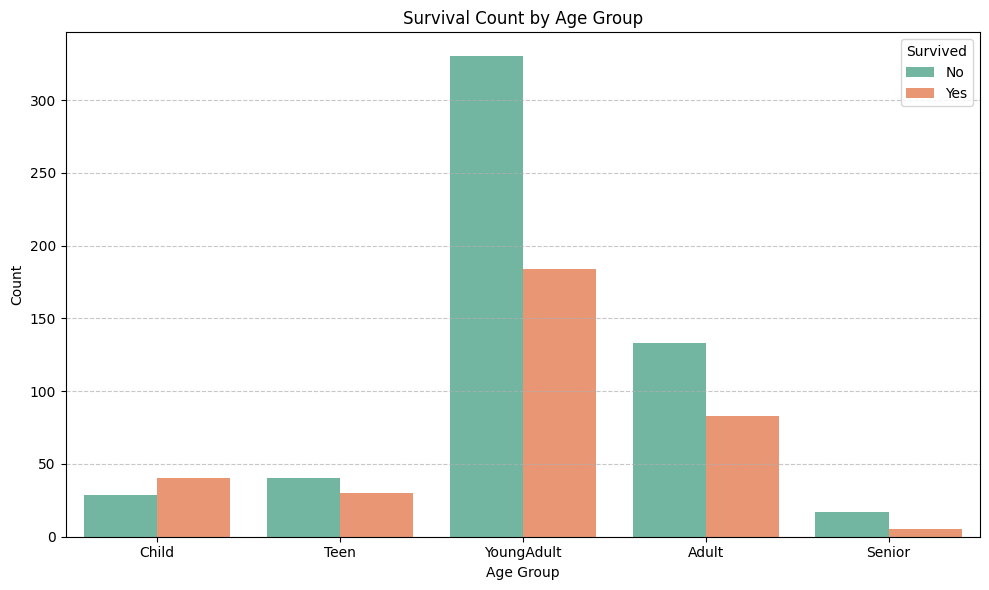

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, bin ages for grouping
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

# Create a countplot of survival by gender and age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeBin', hue='Survived', palette='Set2', dodge=True)
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

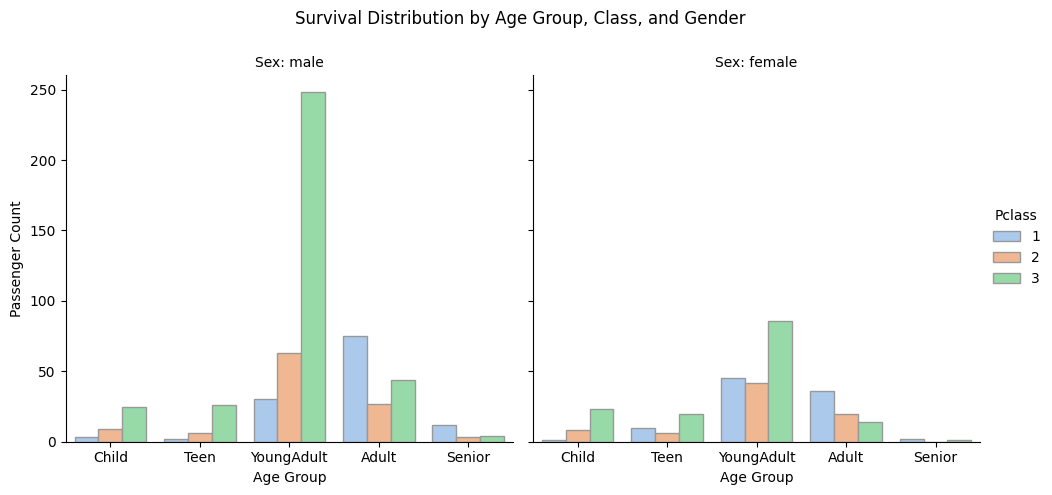

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure AgeBin exists
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], 
                      labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

# Set up the grid
g = sns.catplot(
    data=df, kind="count", 
    x="AgeBin", hue="Pclass", col="Sex",
    palette="pastel", edgecolor=".6"
)

g.set_titles("Sex: {col_name}")
g.set_axis_labels("Age Group", "Passenger Count")
g._legend.set_title("Pclass")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Survival Distribution by Age Group, Class, and Gender")
plt.show()


In [33]:
from sklearn.preprocessing import LabelEncoder

# 1. Encode 'Sex' using LabelEncoder (safe for binary)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'].astype(str))  # ensures no NaNs

# 2. Extract 'Title' from 'Name'
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\s*\.')
df['Title'] = df['Title'].str.strip()

# Optional: consolidate rare titles
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Sir', 'Jonkheer', 'Lady', 'Countess', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Drop 'Name' column
df.drop(columns=['Name'], inplace=True)

# 3. Drop 'Ticket' as it's not used
df.drop(columns=['Ticket'], inplace=True)

# 4. One-hot encode selected categorical variables
categorical_cols = ['Embarked', 'FamilyGroup', 'Deck', 'Title', 'AgeBin']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix

# Step 1: Drop columns not used in training
X = df.drop(columns=['Survived', 'PassengerId'])  # Drop Cabin and ID
y = df['Survived']

# Step 2: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 4: Train Logistic Regression
model = LogisticRegression( max_iter=2000,
    solver='saga',
    penalty='l1',
    C=0.1,
    class_weight='balanced',
    random_state=42)
model.fit(X_train_scaled, y_train)

# Step 5: Predict and Evaluate
val_probs = model.predict_proba(X_val_scaled)[:, 1]
val_preds = (val_probs >= 0.56).astype(int)  # Try adjusting threshold later

# Step 6: Print Metrics
print(f"Accuracy: {accuracy_score(y_val, val_preds):.4f}")
print(f"ROC AUC : {roc_auc_score(y_val, val_probs):.4f}")
print(f"F1 Score: {f1_score(y_val, val_preds):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, val_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_preds))


Accuracy: 0.8156
ROC AUC : 0.8586
F1 Score: 0.7660

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       110
           1       0.75      0.78      0.77        69

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
[[92 18]
 [15 54]]


In [35]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score

# Build pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegressionCV(
        Cs=10,  # test 10 different values of C
        cv=5,
        penalty='elasticnet',
        solver='saga',
        l1_ratios=[0.1, 0.3, 0.5, 0.7, 0.9],  # mix of L1 and L2
        scoring='f1',
        max_iter=5000,
        random_state=42
    ))
])

# Fit model
pipe.fit(X_train, y_train)

# Predict
val_probs = pipe.predict_proba(X_val)[:, 1]

# Threshold tuning
best_f1 = 0
best_thresh = 0.5
for t in np.arange(0.4, 0.7, 0.01):
    preds = (val_probs >= t).astype(int)
    score = f1_score(y_val, preds)
    if score > best_f1:
        best_f1 = score
        best_thresh = t

print(f"🔧 Best F1 Score: {best_f1:.4f} at Threshold: {best_thresh:.2f}")

# Final classification report
final_preds = (val_probs >= best_thresh).astype(int)
print(classification_report(y_val, final_preds))
print("Confusion Matrix:\n", confusion_matrix(y_val, final_preds))
print("ROC AUC:", roc_auc_score(y_val, val_probs))


🔧 Best F1 Score: 0.7879 at Threshold: 0.50
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       110
           1       0.83      0.75      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
 [[99 11]
 [17 52]]
ROC AUC: 0.8670619235836627


In [36]:
best_f1 = 0
best_thresh = 0.5

for t in np.arange(0.45, 0.55, 0.005):
    val_preds = (val_probs >= t).astype(int)
    f1 = f1_score(y_val, val_preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"🔧 Best F1 Score: {best_f1:.4f} at Threshold: {best_thresh:.3f}")


🔧 Best F1 Score: 0.7879 at Threshold: 0.500
